In [1]:
# Analyze microplate reading from a 96 well plate

In [2]:
import csv;
import math;
import matplotlib.pyplot as plt;
from matplotlib.pyplot import figure
import numpy as np; 
import os; 
import seaborn as sns; # Import Seaborn
import pandas as pd; # Import Pandas
import statistics;


In [3]:
filename = "original"; 
file_list = ["Temperature", "Cell", "Air"];
variable_type = ["Cell", "Air"];


In [4]:
# Read data from a csv
def read_original_file(filename):
    filepath = os.path.join("Data", "Original", filename + ".csv")
    
    data_read = [];
    read_file=open(filepath, "r"); 
    reader = csv.reader(read_file);
    
    for line in reader: 
        data_read.append(line[3:-1]);
    read_file.close()
      
    return(data_read)

file = os.path.join("original");
data = read_original_file(file); 

In [5]:
# Move data into one row per time point
def data_by_time(data):
    data_by_time = []; 
    data_for_one_time = []; 
    for i in range(len(data)):
        temp = data[i];
        if temp[0] != "":
            for j in range(len(temp)): 
                data_for_one_time.append(float(temp[j]))        
        else:
            data_by_time.append(data_for_one_time)
            data_for_one_time = [];   
    return(data_by_time)

data_by_time = data_by_time(data)

In [6]:
# Parse data by well
def data_by_well(data_by_time):
    data_by_well = []; data_for_one_well = []; 
    wells = len(data_by_time[0]);
    for i in range(len(data_by_time[0])):
        for j in range(len(data_by_time)):
            temp = data_by_time[j];
            data_for_one_well.append(temp[i]);        
        data_by_well.append(data_for_one_well);
        data_for_one_well = [];
    return(data_by_well)
    
data_by_well = data_by_well(data_by_time)  


In [7]:
# Build time list 
def time_list(data_by_well):
    time = [];
    for i in range(len(data_by_well)):
        time.append(15/60*i);
    return(time)

time_list = time_list(data_by_well[0]);


0.0791
0.0832
0.0856
0.0873
0.0803
0.0916
0.0939
0.0869
0.0836
0.0885
0.0858
0.0975
0.0799
0.0835
0.083
0.0791
1.3188
-4.94209484491
-8.87576106317
-8.53163820412
-8.55526638284
-8.61823521978
-8.25328829745
-8.37460065837
-8.03551220446
-7.7033345795
-7.66396439888
-7.71385354281
-7.67786493852
-7.35484128655
-7.57873568683
-7.50849700273
-7.23667747348
-7.31536315586
-7.13961716617
-6.8844553627
-6.83829617079
-6.71853786359
-6.95074081133
-6.38352202727
-6.25602019654
-6.22216810287
-7.33427901122
-6.26435603961
-6.50944972489
-5.95860492882
-6.25126557883
-6.14172084935
-5.99762298737
-6.28774889766
-5.89802401521
-6.32857814438
-6.11146552424
-6.14860641514
-5.9749570118
-6.02284776464
-5.91978528832
-5.72990237238
-5.486144535
-5.50972536368
-5.5858160209
-5.38178915837
-5.29360622566
-5.2714903502
-5.13145228101
-5.23097392638
-5.04420850306
-4.95121279904
-4.84561716336
-4.74723776633
-4.67750011261
-4.4873052529
-4.31186565535
-4.10958514707
-3.92056527984
-3.69892856636
-3.45

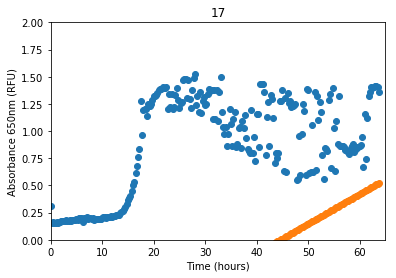

0.8804
-5.56222764433
-12.8766843865
-12.8132990672
-12.6819876721
-12.580950586
-12.5185390348
-12.4186687239
-12.3474032398
-12.3040767198
-12.205569813
-12.2264199562
-12.2942161183
-12.1483797024
-12.1875786342
-12.0974219769
-12.044279641
-12.0093496287
-11.9470496008
-11.8579099287
-11.7959915495
-11.7253404653
-11.6287209682
-11.6195806561
-11.5233946008
-11.4707314171
-11.34177644
-11.1982210973
-11.2288984361
-11.1519026702
-11.0752806701
-10.918973438
-10.7350306003
-10.8318361314
-10.7412544502
-10.613154903
-10.4351465234
-10.1698268291
-10.1838878732
-9.78313990463
-9.545988471
-9.56144823819
-9.55828417485
-9.64420298701
-8.96797222787
-8.74734365899
-6.71824903011
-6.1290349788
-4.4898249595
-4.33996857264
-4.81944775159
-5.65178723985
-7.62241575129
-7.33678866817
-7.16096492893
-6.99271812432
-6.5810407458
-6.1555178628
-5.69756285389
-5.23932084408
-4.7510956466
-4.3369458693
-4.24503003
-3.90003568116
-3.60425514782
-3.31285787936
-3.16390949202
-3.0634509104
-2.9615

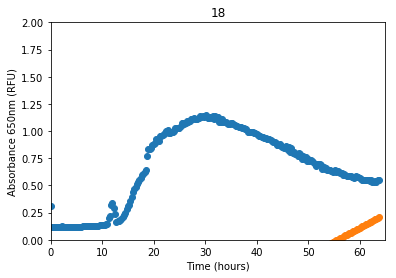

0.7323
0.6995
0.9287
-3.92257212086
-2.48526612167
-3.01415346032
-3.30056578672
-3.41259565871
-3.3947413328
-3.51182639397
-3.48589208355
-2.98434867691
-2.7502756384
-2.70549864426
-2.62545049229
-2.7616541637
-2.78663953787
-2.91113384768
-2.50037337476
-2.44222585584
-2.4045265005
-2.41433013951
-2.9000185168
-2.42279401558
-2.55490789268
-2.94173228396
-5.19439289653
-7.05192429775
-6.92007999944
-6.90143813494
-6.82363486515
-6.75114320756
-6.67967689166
-6.60527802541
-6.50518312377
-6.44482240455
-6.3962193478
-6.29001586445
-6.22515904047
-5.99113020322
-6.03455282829
-5.99619730371
-5.9258390005
-5.83489231764
-5.80701655669
-5.76085326719
-3.00039783945
-2.21667777799
-2.74711579494
-3.74918935465
-4.40249212673
-4.82975347758
-4.72734219298
-4.86986536929
-4.81301373343
-4.72922999305
-4.63289474691
-4.44712743778
-4.25576815531
-4.04280105747
-3.81832389073
-3.5962205237
-3.35133040793
-3.10632504038
-2.99091814321
-2.87761365343
-2.68267074551
-2.51539247174
-2.375809564

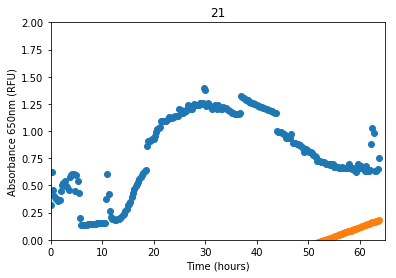

0.7135
0.7111
0.8408
-6.39541157984
-11.406743776
-11.1984345736
-11.1044735091
-11.0113218722
-10.8068112924
-10.6691208611
-10.5141074796
-10.4140756277
-10.3535793826
-10.3060323474
-10.2776275975
-10.1793723474
-10.0883839466
-10.0846041649
-10.006355251
-9.9043928706
-9.88157747397
-9.84656027276
-9.82349318592
-9.76425743473
-9.71706740802
-9.51298281744
-9.34913217085
-9.27608931842
-9.32931346415
-9.18500448426
-9.2261673888
-9.0620538247
-9.30553136622
-9.25853382093
-8.83852684066
-8.51566737943
-8.80451181908
-9.08153144593
-8.63430550125
-8.66895615412
-8.62377093247
-8.53916523898
-8.52847991406
-8.37256715527
-8.33279843539
-7.29516272582
-7.43936416251
-7.33811553445
-7.27048668942
-7.51839966028
-7.65032462751
-7.57257519364
-7.39596744813
-7.11336483134
-7.0295953094
-6.78202866689
-6.63105882699
-6.45738913188
-6.25200026328
-6.000403446
-5.70343172191
-5.388727269
-5.05899758537
-4.70106597234
-4.36195167593
-4.02098960123
-3.90288361557
-3.73375223778
-3.44438056057

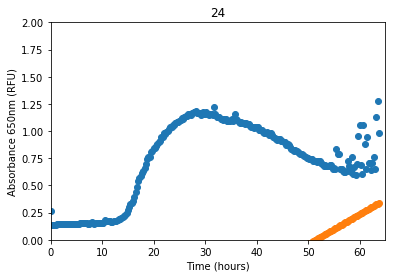

0.0834
0.0817
0.0798
0.9095
-6.07989054185
-13.49547918
-13.4395984684
-13.1923813452
-13.3170985113
-13.3256864403
-13.1842075988
-13.2027502734
-13.125457106
-12.9753494022
-12.992552776
-12.864265908
-12.6871935521
-12.7125842017
-12.5871908407
-12.4828907293
-12.38917119
-12.3539179189
-12.2703801062
-12.2445404852
-12.151791048
-12.0878598949
-12.0427856464
-11.9417618493
-11.8967165829
-11.7603283361
-11.6526654523
-11.6167980213
-11.5014540527
-11.5181624891
-11.455619875
-11.4193613222
-11.2878034655
-11.3203941029
-11.0305203664
-10.9452361948
-11.0490303025
-10.7525452375
-10.7878830619
-10.7195244489
-10.6435230231
-10.4148060585
-10.3187996791
-10.1011080695
-9.96686448079
-9.85548220657
-9.66618598969
-9.47649777828
-9.28079103151
-9.05708386823
-8.69185634897
-8.47317381571
-8.11934403825
-7.70284305867
-7.2702237862
-6.79796005705
-6.28980907039
-5.81532261527
-5.28526869121
-4.78289180411
-4.54645352141
-4.39372299354
-4.04040515574
-3.65873041522
-3.37689183135
-3.1505

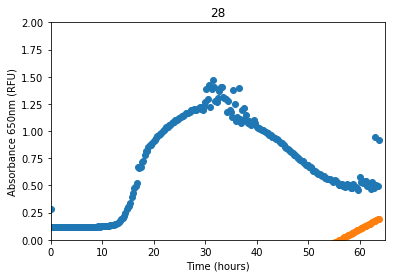

0.7061
0.7012
0.7103
0.7098
0.7088
0.7057
0.6765
0.747
0.081
0.0792
0.9195
-6.48948280947
-14.2816047555
-14.1315988744
-14.0754396066
-14.1238926752
-13.848813097
-13.7478641044
-13.6143365329
-13.580484912
-13.5464551247
-13.5012508171
-13.4668616895
-13.345046145
-13.3103053589
-13.2537691732
-13.1436371653
-13.0237650272
-12.9673737272
-12.8900787176
-12.7412009708
-12.7052776583
-12.6286132883
-12.4823110289
-12.5056200611
-12.2724315835
-12.3725149962
-12.2863340568
-12.0756824517
-12.0006729528
-11.9539027415
-11.8789333199
-11.8133502759
-11.7385653765
-11.7097155906
-11.5893790899
-11.4791813812
-11.4051893798
-11.2876203878
-11.137107287
-11.0644563904
-10.9502594341
-10.780384199
-10.6298366614
-10.5050810923
-10.3442278235
-10.1070063092
-9.98288847912
-9.77183462321
-9.57430133582
-9.27192225975
-8.99213095112
-8.67368271726
-8.26860469582
-7.87761050433
-7.41019202456
-6.895204963
-6.3879187041
-5.88476978528
-5.36423641046
-4.83743158543
-4.57253617861
-4.42619230125
-4.

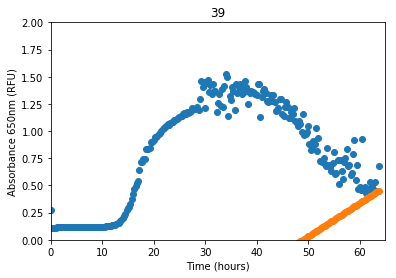

0.7504
0.7402
0.7273
0.7213
1.3811
-5.51638700052
-12.7904299934
-12.5649252365
-12.5424900139
-12.6508109852
-12.567488026
-12.5953180785
-12.4622846912
-12.4495739457
-12.3676247514
-12.4041517298
-12.2929249923
-12.2702158971
-12.2572055799
-12.2344064963
-12.221300129
-12.1307170988
-12.0505615239
-12.1138210791
-12.081238817
-12.0582474027
-12.016074293
-11.9930263122
-11.9794773596
-11.9563373502
-11.9426889863
-11.9194562994
-11.9248069798
-11.8633731204
-11.8495143261
-11.8071918939
-11.8216507273
-11.7040878313
-11.6528047671
-11.6016997691
-11.523414681
-11.3039248198
-11.422442799
-11.3455306531
-11.2956518779
-11.1763616683
-11.0675540835
-11.0274573645
-10.9874280915
-10.7347735631
-10.5468586607
-10.350039711
-10.1243444423
-9.90115404431
-9.64858790798
-9.53829453229
-8.93862360479
-8.57017445384
-8.23686502172
-7.88810767511
-7.47265938994
-7.01514869261
-6.54155719091
-6.01843024794
-5.52588295091
-5.01874359177
-4.61486111506
-4.57618468001
-4.26112724661
-3.884010845

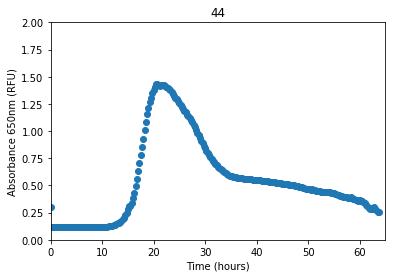

0.7228
0.7268
0.7051
0.7618
0.142
0.9302
-7.13126183451
-12.8858820888
-12.8722517485
-12.7084202574
-12.7240513219
-12.6207835244
-12.4032011347
-12.3031500529
-12.1762162127
-12.1330071932
-12.0714420201
-11.9828378164
-11.9126891508
-11.851657809
-11.7995712945
-11.7123622806
-11.64305537
-11.4212201732
-11.5051177139
-11.3524551049
-11.2599869226
-11.2336480263
-11.1662219879
-11.1233470274
-11.1292580786
-11.1270097025
-10.9542344873
-10.943144008
-10.8602241654
-10.7856635407
-10.6192628279
-10.6299384289
-10.6253256951
-10.4909687321
-10.4107241291
-10.2363654255
-10.1298255254
-10.1873955921
-10.0876628956
-9.92668588933
-9.87772938101
-9.84239752219
-9.71935856233
-9.55294799484
-9.42865411022
-9.26978966611
-8.96997099412
-8.89065092734
-8.63864657017
-8.39458663497
-8.09767748279
-7.76518231925
-7.32612943152
-6.94619267105
-6.49827045885
-5.9859007168
-5.56212069988
-5.07930407189
-4.63172598889
-4.46288262116
-4.27656816256
-3.91609508668
-3.56141934861
-3.25549095209
-3.0

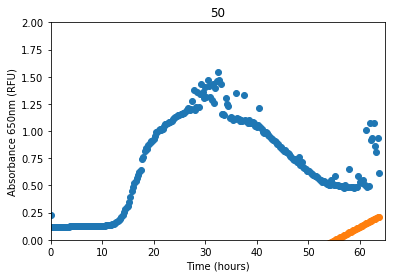

0.9573
-6.79547642412
-13.4441406979
-13.184975583
-13.1447257701
-13.2175611922
-12.9329090011
-12.9524352981
-12.80247792
-12.6934751224
-12.6334859375
-12.6120750751
-12.5905209962
-12.4821283371
-12.3840739869
-12.3335400129
-12.2641951841
-12.1949653551
-12.107445194
-12.0022028509
-11.9427078108
-11.8832127707
-11.8505312345
-11.6762796947
-11.7135526527
-11.5582617558
-11.5944644768
-11.4658955215
-11.3897231832
-11.3222258778
-11.2381234685
-11.1792587752
-11.079321054
-11.0206952596
-10.9620694653
-10.8793867227
-10.7971047043
-10.684006944
-10.5951654657
-10.4766385744
-10.3967521503
-10.2951664539
-10.2017732117
-10.0594129177
-9.99610575915
-9.85707779021
-9.70728689882
-9.53487865874
-9.35466756689
-9.14993802004
-8.92418953875
-8.67042426682
-8.34975483294
-7.98331645543
-7.610946281
-7.19971356175
-6.7013212652
-6.24051806041
-5.77996466834
-5.26205012827
-4.78839946662
-4.55480067416
-4.40788370316
-4.05574518176
-3.68004779152
-3.37215915914
-3.11372931562
-2.973613906

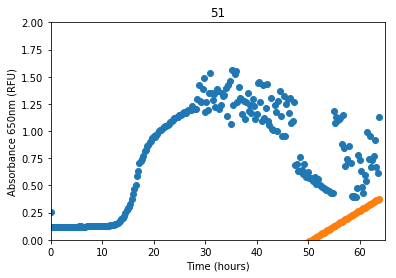

1.0125
-6.763881487
-14.5690288687
-14.4323420852
-14.2853362815
-14.2769600737
-14.1649257833
-14.0084610099
-13.8980826439
-13.7663745362
-13.6790254932
-13.6894368174
-13.5261689378
-13.4710769766
-13.3521794834
-13.2968841047
-13.1580534994
-13.1440275494
-12.9957683236
-12.889464709
-12.8036730808
-12.7180267389
-12.6128757788
-12.498569247
-12.5203358309
-12.3195725879
-12.36864711
-12.2832244605
-12.1695494356
-12.0846556804
-11.9721276675
-11.8512514773
-11.8126142605
-11.6746268387
-11.6265792477
-11.5516885045
-11.4417875766
-11.2812552383
-11.1735180974
-11.025234229
-10.8390932761
-10.7587825474
-10.6396065991
-10.5292192077
-10.3598589962
-10.2229635801
-9.98248696822
-9.79757716296
-9.6044306097
-9.37940812495
-9.10958510197
-8.85267408853
-8.49445174216
-8.13911610308
-7.76015885159
-7.30547066741
-6.80277713795
-6.29540475574
-5.77048790009
-5.29259869575
-4.7900980857
-4.46446281252
-4.35283646026
-4.03353804519
-3.64825677977
-3.33840563771
-3.08814972998
-2.76284388


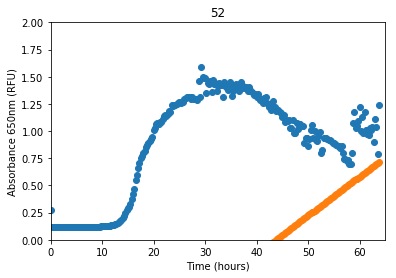

1.3178
-6.15426225276
-12.2980984205
-12.2054391864
-12.0875371582
-12.0912793587
-11.9742708629
-11.8755182964
-11.785988395
-11.7966544632
-11.7571307733
-11.7009293613
-11.6037470566
-11.4913447045
-11.4041029824
-11.3411350979
-11.3255435521
-11.325705405
-11.1920732021
-11.1682638277
-11.167701197
-11.1985862096
-11.1429901687
-11.0486819905
-11.001187613
-10.9155564798
-10.9061988581
-10.6653965496
-10.699295159
-10.6230708441
-10.6200211368
-10.5222311075
-10.5114846929
-10.4645320764
-10.3961433914
-10.2928916283
-10.1634018
-10.1997653979
-10.1670288723
-10.0860824201
-9.99226111194
-9.91269064492
-9.72353298909
-9.23133804692
-9.48967538435
-9.37263761946
-9.28697843509
-9.13876458931
-8.77833850093
-8.54310508833
-8.54717479368
-8.30315157716
-8.04987401941
-7.7454908943
-7.41499607343
-7.02255322374
-6.62539683378
-6.17904350661
-5.70534847336
-5.24453787082
-4.74784667294
-4.34490147961
-4.28665072484
-4.03540944391
-3.6153057533
-3.36398590603
-3.06392046145
-2.8545632185

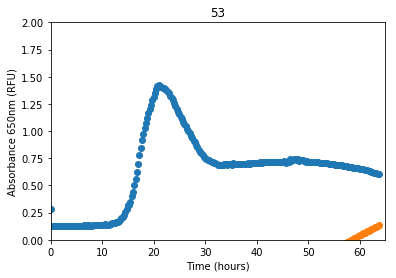

0.9221
-7.02887260832
-15.0922888061
-14.9064224187
-14.6737895801
-14.5928723669
-14.3787984969
-14.3349347955
-14.2432327629
-14.1991254573
-14.0841976163
-14.098622379
-14.0305341838
-13.9159021969
-13.8711665025
-13.8378352156
-13.7352350336
-13.7359886625
-13.6333864419
-13.4640855702
-13.4298383594
-13.3288836083
-13.2284692038
-13.2155341226
-13.1044269501
-13.0369466852
-12.9587889303
-12.9126224255
-12.7923902113
-12.7251500897
-12.6372032009
-12.5087569854
-12.4927551117
-12.3752271327
-12.0545589098
-12.2119835426
-12.1160135538
-12.0108980101
-11.8970075248
-11.7654157142
-11.718499859
-11.4621772727
-11.3011453077
-11.2633176525
-10.9631102158
-10.9499770194
-10.6779857263
-10.4473753485
-10.1599755572
-9.7923969613
-9.51096392877
-9.21423321992
-8.86848492274
-8.46727935677
-8.02965210732
-7.53880080915
-7.02079215732
-6.44165646551
-5.90943239397
-5.31634960485
-4.76386033498
-4.63410199518
-4.38776097371
-3.95774190533
-3.58880371535
-3.27997916309
-3.08529554618
-3.020

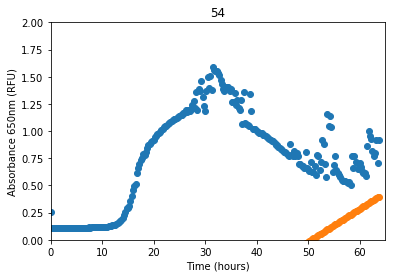

0.8891
-6.35867975499
-12.9666641025
-12.8477559812
-12.7203477465
-12.7026438864
-12.6158254244
-12.442974813
-12.3771787699
-12.3493699682
-12.3214681605
-12.2745874732
-12.1902810967
-12.1901824385
-12.1246438697
-12.0685554341
-12.0309608254
-11.9475360583
-11.9008505446
-11.8722703937
-11.8435947369
-11.7697613318
-11.6874122061
-11.6320124433
-11.5679417499
-11.486735252
-11.4060634471
-11.4027254431
-11.3649532541
-11.2591769591
-11.0640922854
-11.1005070084
-11.0876649806
-10.9600666458
-10.9630822486
-10.8930263817
-10.8393111306
-10.7381415112
-10.6692532022
-10.5621718799
-10.4114260797
-10.3372844608
-10.307653135
-10.1687756505
-10.018697405
-9.90619257727
-9.80212455956
-9.50586924813
-9.49578737491
-9.28742565147
-9.07555671231
-8.8503034487
-8.57829623073
-8.22694541206
-7.85661091801
-7.43537227255
-7.03595155761
-6.53845542236
-6.0508144435
-5.53490761456
-5.02889711845
-4.59627660562
-4.51700503697
-4.27005040678
-3.87468788973
-3.53494892382
-3.24586374622
-3.125005

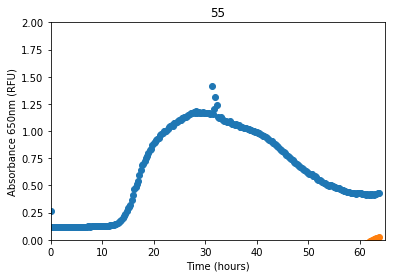

1.0427
-6.29754061341
-11.5257785396
-11.3239258345
-11.3116714729
-11.2992915175
-11.174482892
-11.1465644808
-11.0447991666
-11.0164071114
-10.9368115363
-10.886249742
-10.7217521168
-10.6503543773
-10.5721484407
-10.5492065359
-10.3625266811
-10.3996526253
-10.3083106427
-10.1910639011
-10.1732286907
-10.069834077
-9.99946665524
-9.92920004635
-9.80859113549
-9.78896840202
-9.79443771209
-9.76178899228
-9.62245313341
-9.58317046664
-9.47032491365
-9.42467491752
-9.36680687991
-9.28506519059
-9.19197100706
-9.11684517988
-9.07063377103
-8.95029425504
-8.8815669083
-8.62935712175
-8.62575698874
-8.4495845792
-8.41390337036
-8.26755705972
-7.96529661962
-7.99874979287
-7.87073266474
-7.70580389636
-7.52507666097
-7.31927307703
-7.09307077066
-6.82392939428
-6.54515959802
-6.24779297123
-5.91057133855
-5.15300053807
-5.19608084858
-4.81870125736
-4.3670454206
-4.03336348894
-3.8168149459
-3.67915017101
-3.4122745399
-3.13823072084
-2.91531444719
-2.71582790169
-2.43639599614
-2.33308636

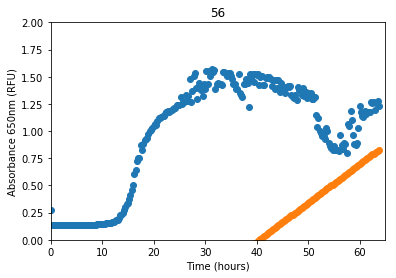

1.1596
-5.7397541226
-11.3975319949
-11.0904867288
-10.8762067446
-10.6450578462
-10.5632141922
-10.4072636121
-10.3193917731
-10.2391439584
-10.1023456181
-10.0582342099
-9.84176394864
-9.57447058915
-9.41749975656
-9.31861407114
-9.02682523678
-9.09396002335
-8.76255153777
-8.44767462613
-8.5284818054
-7.98332035823
-7.78450367609
-7.8438344449
-7.55799377836
-7.32138091533
-6.84416590124
-6.68192436308
-6.27520077342
-6.63898603688
-6.22078747329
-5.97823305474
-5.75820135757
-5.15778813186
-5.26684676777
-5.16237710036
-4.78604871042
-4.23715260622
-4.39155711939
-4.65713509715
-3.94464173358
-4.77347990438
-3.60850617556
-4.38649471672
-4.00012144227
-3.87746277673
-3.6187508269
-3.42175205741
-3.10259432061
-2.90822265929
-2.95676998474
-2.8614925169
-2.7982330784
-2.72138398998
-2.57142934689
-2.54114968591
-2.51314730183
-2.44855711034
-2.38352993179
-2.31666666104
-2.25718893953
-2.18808199906
-2.15317603549
-2.11370675993
-2.05120291989
-1.98912073163
-1.91322180804
-1.852287

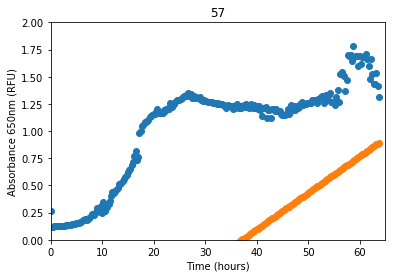

0.8571
-6.38854265772
-12.4548196482
-12.2788950844
-12.2533403859
-12.1668353562
-12.1324032119
-12.0464057237
-11.9948206103
-11.9011137281
-11.8664576685
-11.8990244438
-11.7635260773
-11.7368950429
-11.6770587248
-11.6584352531
-11.5332990576
-11.5386988693
-11.519617146
-11.4112927194
-11.3918608572
-11.3162417689
-11.2409722295
-11.1974023261
-11.1225228309
-11.0711758025
-11.0121271379
-10.9915391439
-10.8867140589
-10.8962376512
-10.806896894
-10.7406152895
-10.7342101661
-10.652974211
-10.5795769261
-10.550359089
-10.7385863184
-10.640403844
-10.6106633367
-10.4175155906
-10.3224838016
-10.2425137231
-10.1770984013
-9.98791238101
-9.97817535553
-9.7286605838
-9.54587329644
-9.20324878807
-9.07634688738
-8.9961734579
-8.82984929551
-8.61703486607
-8.31233668942
-8.05436625494
-7.7698698876
-7.44767118484
-7.09355627478
-6.694642497
-6.25566651901
-5.81449728227
-5.34771170319
-4.8984272855
-4.46243040417
-4.34579567136
-4.07873032178
-3.73054311487
-3.38941668958
-3.15747133482

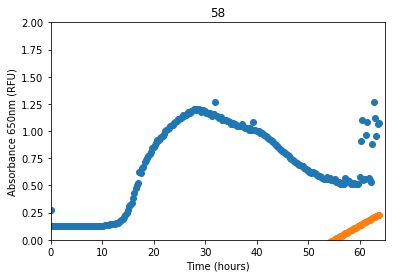

0.7609
0.7765
0.9665
-11.2161733017
-11.5149577298
-11.3797276431
-11.3908688274
-11.4107276087
-11.3445801432
-11.2451120283
-11.1884937982
-11.1321531085
-11.0843065922
-10.9475095716
-10.964776023
-10.9095253346
-10.8625022543
-10.7919406822
-10.7375495547
-10.6294516102
-10.614191148
-10.5988819303
-10.5301548559
-10.5147483116
-10.5373506477
-10.4385187633
-10.4606580502
-10.3699737996
-10.369243634
-10.2867850867
-10.2710408828
-10.2405440418
-10.2912255015
-10.1360109905
-10.1782138488
-10.0111953355
-9.97401359578
-9.88813079642
-9.82381699457
-9.72625636841
-9.65666046272
-9.56808051834
-9.4807066549
-9.38821221844
-9.29091820712
-9.14109143753
-9.04211789567
-8.8992950421
-8.7168805769
-8.58857526915
-8.38775746295
-8.17223398845
-7.9097249328
-7.60694638511
-7.24680297739
-6.8187682788
-6.41001362315
-5.9745375845
-5.58354923566
-5.10208636754
-4.65798845175
-4.52217045176
-4.28724700712
-3.92280567944
-3.56413373634
-3.24823621532
-2.98227733585
-2.79098639545
-2.6515541081

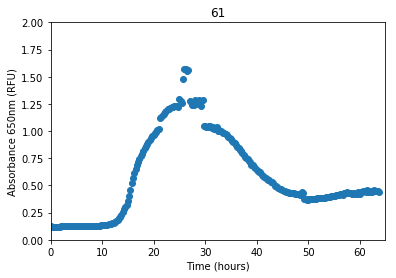

1.0529
-6.34724542702
-12.3471870698
-12.2423276685
-12.0172599133
-12.0731036875
-11.8522088089
-11.5948028664
-12.017122351
-11.5306418365
-11.5807329141
-10.8676364898
-11.6836932301
-11.754858343
-11.5291074316
-11.5892109042
-11.4807787311
-11.4083360446
-11.3018593172
-11.1881886158
-11.1092105034
-11.0389933254
-10.9772995922
-10.9483989555
-10.7115832834
-10.8416309932
-10.6460593753
-10.6482912601
-10.6035455831
-10.466592833
-9.87978394714
-10.3629118268
-10.333650693
-9.57901617518
-10.0415158128
-10.005256837
-9.98308735466
-9.86966204352
-9.80585590752
-9.75598653935
-9.65224482522
-9.5171811458
-9.43615157985
-9.17583064421
-9.1712995321
-8.96957915064
-8.80366308484
-8.57314701598
-8.33358487811
-7.43394092983
-7.74208338317
-7.41387653577
-6.97754720155
-6.55146112918
-6.07232908886
-5.62160319842
-5.20777966625
-4.68354737577
-4.36566399994
-4.33310545332
-3.99806866815
-3.65933277916
-3.30705774779
-3.01713883996
-2.82183309737
-2.69938931225
-2.58682440403
-2.5165457

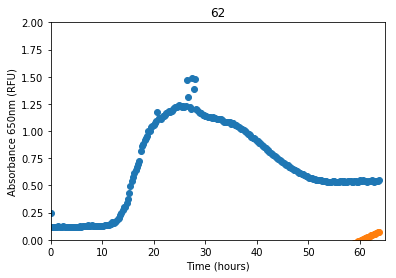

0.0763
0.0875
0.0822
0.0823
0.0842
0.0904
0.0972
0.0892
0.0841
0.0862
0.0712
1.282
-3.74763220129
-5.65358468957
-5.36902122834
-5.06981997413
-4.69702090129
-4.5680911333
-4.14630394332
-4.08204274044
-3.89023640178
-3.64854828597
-3.31706882203
-3.32822001301
-3.08175294449
-2.91298657278
-2.72510953777
-2.59165601583
-2.51707169136
-2.4815861468
-2.32251483568
-2.25806305526
-2.16017197922
-2.14077623195
-2.02102156865
-1.98013395386
-1.97717108913
-1.86949755194
-1.83802139682
-1.85515209553
-1.78863183554
-1.76323092627
-1.74024590837
-1.7242919897
-1.63277437196
-1.62102344617
-1.6082082894
-1.60677449059
-1.57225734297
-1.58351849591
-1.57096467342
-1.54975930947
-1.54051939469
-1.53784442429
-1.52477444914
-1.5112359472
-1.49897213407
-1.49041429572
-1.4584960275
-1.46149239686
-1.43983577193
-1.43966293748
-1.43253740569
-1.41419143272
-1.40676815095
-1.38166476491
-1.37214543376
-1.36557121767
-1.35184797302
-1.33916268785
-1.32818826318
-1.31503077707
-1.30915794701
-1.29722

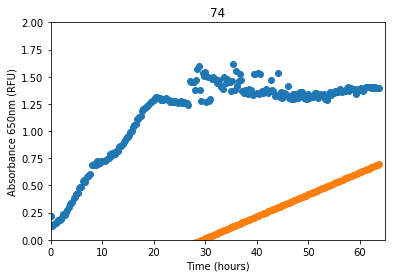

1.0154
-7.7123337986
-12.7180938651
-12.5522563003
-12.4364439379
-12.4726048091
-12.3006291365
-12.3356009223
-12.0470624401
-11.935865027
-11.8960407551
-11.8649202418
-11.8072023955
-11.7146119311
-11.6398228971
-11.5823854614
-11.4825087191
-11.4590417303
-11.4269589177
-11.3025826853
-11.1879566341
-11.1473793309
-11.0581595305
-10.9536339013
-10.9050429856
-10.7321997747
-10.8785839878
-10.7277255157
-10.5571109478
-10.4863729627
-10.3790762097
-10.3528858271
-10.2754863818
-10.2344650346
-10.1574036063
-10.0948800804
-9.99736297584
-9.90764002849
-9.81181485649
-9.66371985566
-9.5965488718
-9.52958205505
-9.40542181715
-9.27711689191
-9.15712910013
-9.00965523579
-8.84855871408
-8.70829306631
-8.52341048584
-8.33984030284
-8.09076549674
-7.83717662779
-7.53198400278
-7.17482570676
-6.78807413161
-6.37951457475
-5.90154437438
-5.52059420027
-5.07774970367
-4.64265682491
-4.30782336093
-4.22361121717
-3.91650392137
-3.55806110547
-3.24986388916
-2.97275417242
-2.77161183827
-2.640

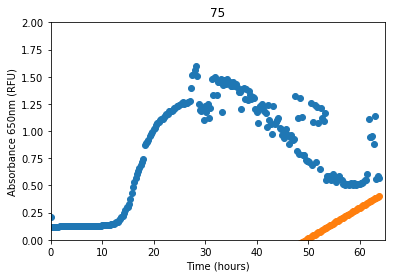

0.0792
0.0862
0.0916
0.0929
0.0902
0.0888
0.0904
0.0856
0.0843
0.0715
0.0736
0.0697
0.0789
0.0766
0.0842
0.0945
0.0998
0.0964
0.0962
0.098
0.0859


In [8]:
# Plot wells 
def plot_wells(well_data,i):
    
    time_complete = [];
    
    for j in range(len(well_data)):
        time_complete.append(j*15/60);
    
    z = np.polyfit(time_complete, np.log(well_data), 1);
    y_fit = np.polyval(z, time_complete); 
    
    # Check error
    testing = 1;
    for k in range(len(y_fit)):
        # Calculate % error from the measured value 
        a = (y_fit[k] - well_data[k]) / well_data[k]; 
        print(a)
        
    plt.scatter(time_complete, well_data);
    plt.scatter(time_complete, y_fit);
    plt.xlabel("Time (hours)"); plt.xlim([0,65])
    plt.ylabel("Absorbance 650nm (RFU)"); plt.ylim([0,2])
    plt.title(i+1)
    plt.show()

# Plot wells with RFU > 0.5 after 20 hours (20*4 = 80 reads)
cell_data = []; samples_included = []; 
for i in range(len(data_by_well)): 
    well_data = data_by_well[i];
    
    print(well_data[80])
    if float(well_data[80]) > .8:
        plot_wells(well_data, i)
        cell_data.append(well_data)
        samples_included.append(i+1);
        

In [9]:
print("Number of Samples Included: " + str(len(samples_included)))
print("List of Samples Included: " + str(samples_included)) 

Number of Samples Included: 20
List of Samples Included: [17, 18, 21, 24, 28, 39, 44, 50, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 74, 75]


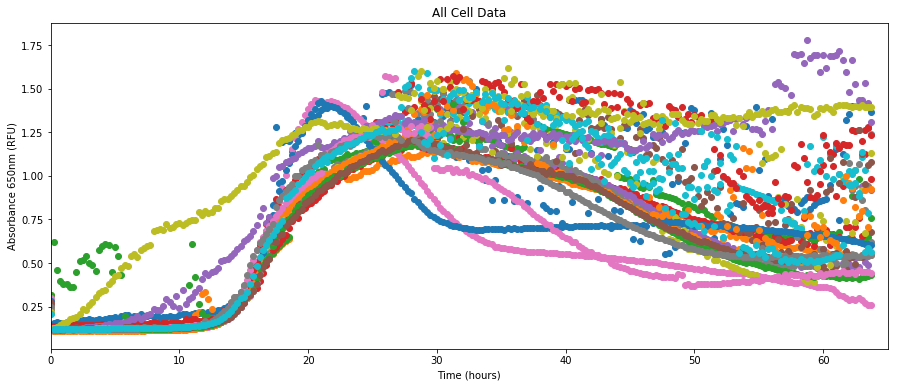

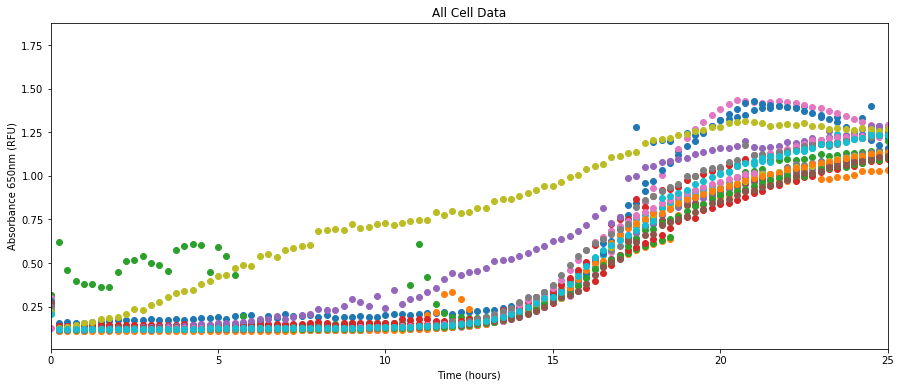

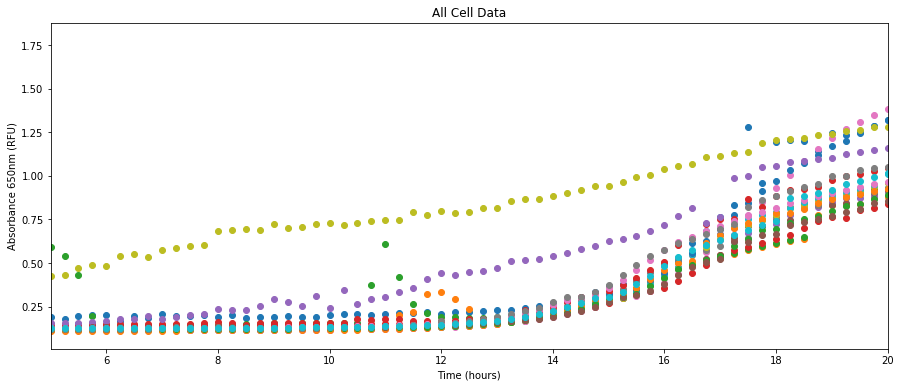

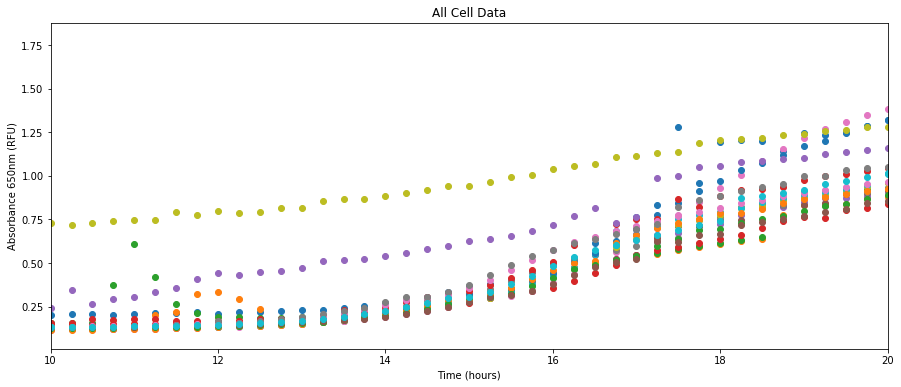

In [10]:
# Print all cell data on one scatter plot
def all_cell_data_one_plot(cell_data, time_min, time_max, plot_number):
    
    height = 6; 
    plt.figure(figsize=(2.5*height,height))
    for i in range(len(cell_data)):
        well_data = cell_data[i];
        plt.scatter(time_list, well_data)
    
    plt.xlabel("Time (hours)"); plt.xlim([time_min, time_max])
    plt.ylabel("Absorbance 650nm (RFU)"); 
    plt.title("All Cell Data")
    plt.show()

all_cell_data_one_plot(cell_data, 0, 65, 1)
all_cell_data_one_plot(cell_data, 0, 25, 2)
all_cell_data_one_plot(cell_data, 5, 20, 3)
all_cell_data_one_plot(cell_data, 10, 20, 4)
    

In [11]:
# Curve fitting for each well  
def determine_growth_constant(cell_data, samples_included, hr_min, hr_max):
    growth_constant1 = []; 
    growth_constant2 = []; 
    time = []; 
    y_error_list = []; 
    
    for i in range(len(cell_data)):
        y_error_well = []; 
        temp = cell_data[i]; 
        temp = temp[hr_min*4:hr_max*4];
        
        # Build the list of times
        time = []; 
        for j in range(len(temp)):
            time.append(j*15/60);
        
        # Assumme exponential growth using equation y = a * b ^ (x/tau)
        z1, z2 = np.polyfit(time, np.log(temp), 1) 
        z = np.polyfit(time, np.log(temp), 1)
        yfit = np.polyval(time, np.log(temp))
        
        for j in range(len(temp)):
            a = (yfit[j] - temp[j])/temp[j];
            y_error_well.append(a);
        
        y_error_list.append(y_error_well)
        
        growth_constant1.append(z1)
        growth_constant2.append(z2)
        
     
    for k in range(len(y_error_list)):
        a = y_error_list[k]; b = a[0]; 
        
        if b < 10:
            plt.scatter(time, y_error_list[k])
            plt.title(str(samples_included[k]) + " Error: " + str(hr_min) + " " + str(hr_max) )
            plt.show()
    
    return(growth_constant1, growth_constant2, y_error_list)
        

0.142423826758 -2.32294029592


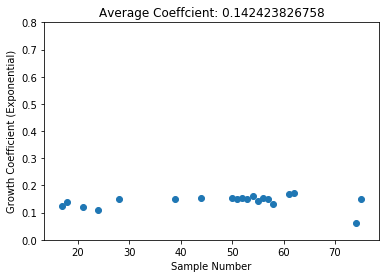

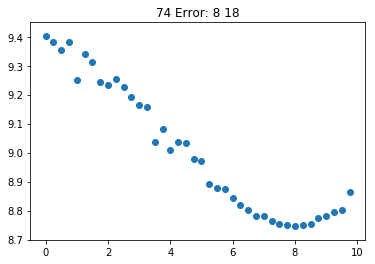

0.177975976967 -2.25940597575


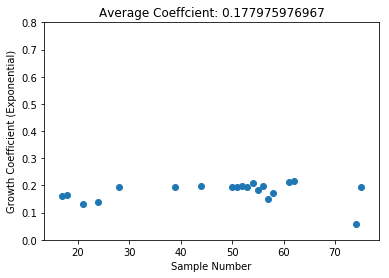

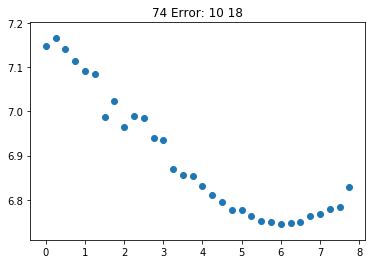

0.225117543122 -2.13379139297


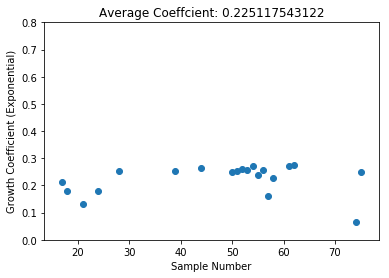

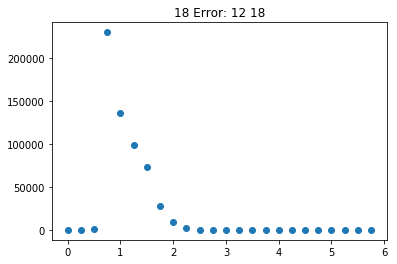

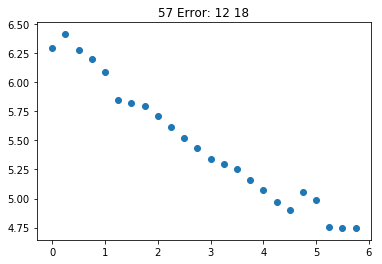

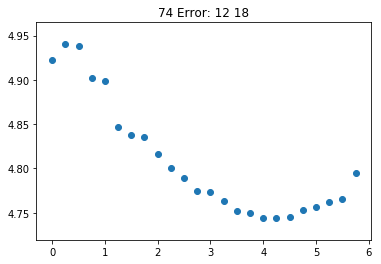

0.28573260375 -1.89958528655


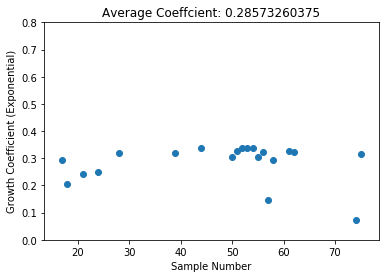

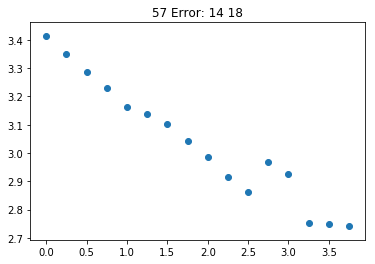

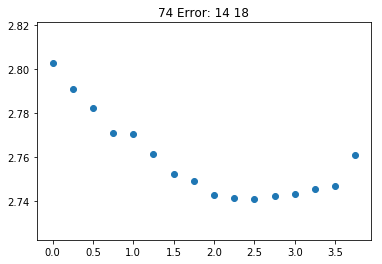

0.32032513324 -1.40014492325


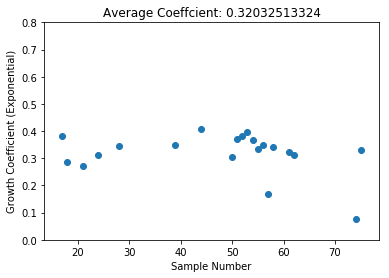

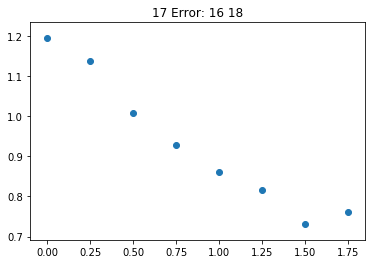

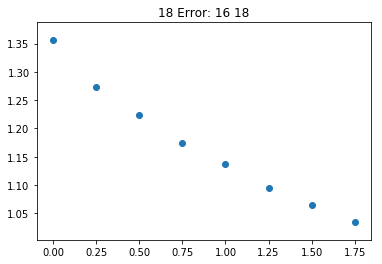

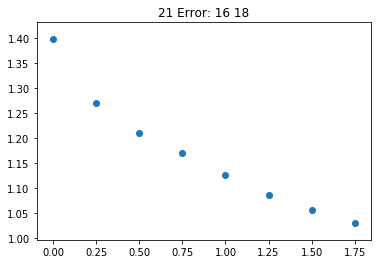

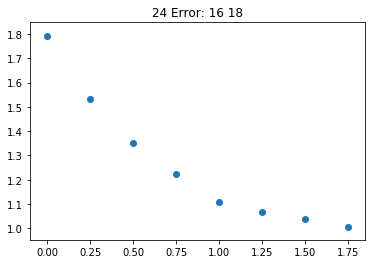

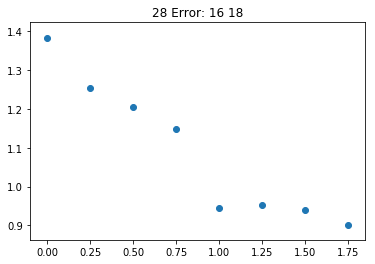

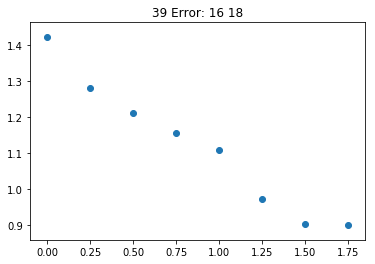

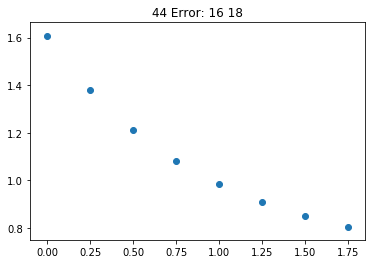

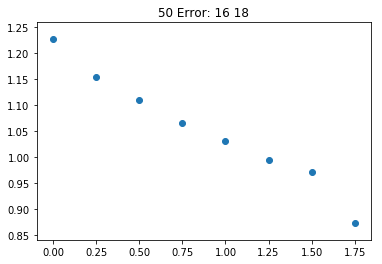

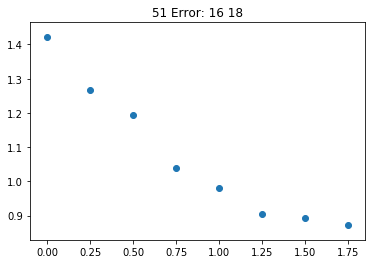

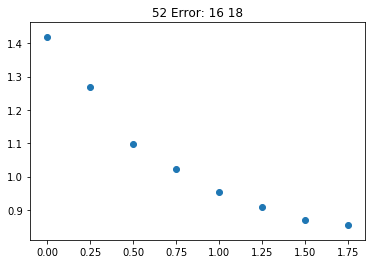

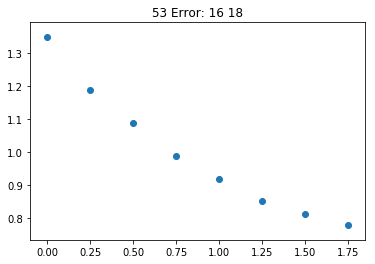

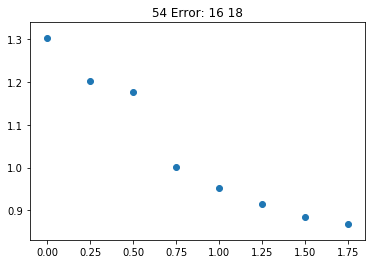

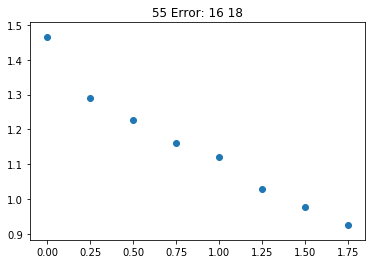

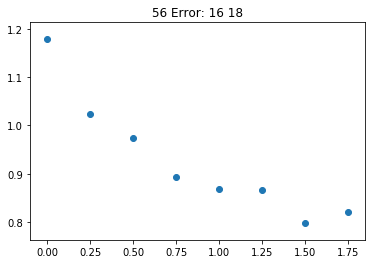

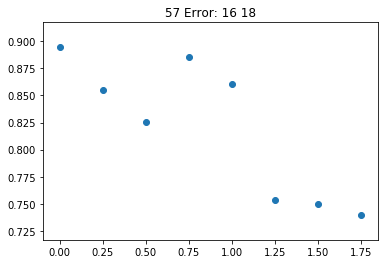

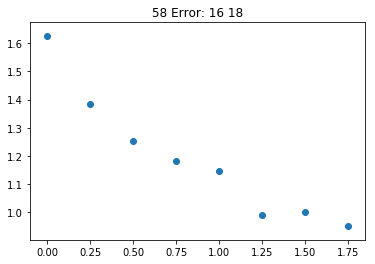

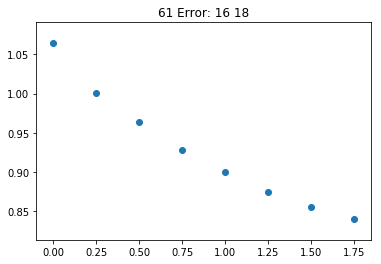

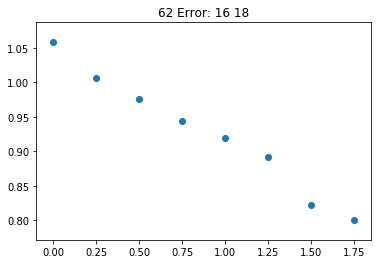

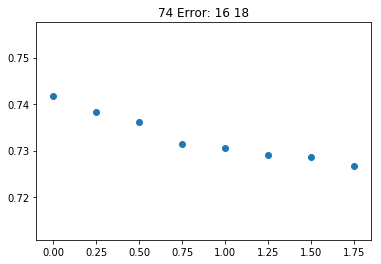

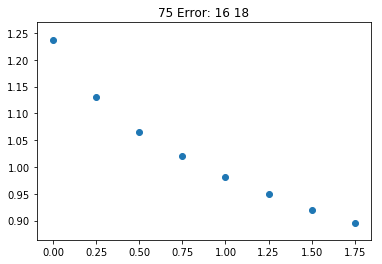

0.280130411243 -0.717960524256


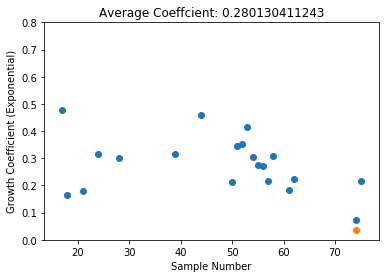

[1.7931327469374438, 1.533640072133357, 1.3531555785902494, 1.2236418529600668, 1.1085727963855223, 1.0652836499427862, 1.0371083479805996, 1.0072155967648992]
[6, 8, 10, 12, 14, 16]


In [12]:
# Plot growth constants
def growth_constant_scatter(samples_included, growth_constant1, growth_constant2):
    average_growth_constant1 = sum(growth_constant1) / len(growth_constant1)
    average_growth_constant2 = sum(growth_constant2) / len(growth_constant2)
    print(average_growth_constant1, average_growth_constant2 )

    plt.scatter(samples_included, growth_constant1)
    plt.scatter(samples_included, growth_constant2)
    plt.xlabel("Sample Number"); 
    plt.ylabel("Growth Coefficient (Exponential)"); plt.ylim([0,.80])
    plt.title("Average Coeffcient: " + str(average_growth_constant1) )
    plt.show()
    

y_error_max = []; sample_start = []; 
hr_min = [6,8,10,12,14,16]

for i in range(len(hr_min)):
    growth_constant1, growth_constant2, y_error = determine_growth_constant(cell_data, samples_included, hr_min[i], 18)
    growth_constant_scatter(samples_included, growth_constant1, growth_constant2)
    y_error_max.append(max(y_error)); 
    sample_start.append(hr_min);
    
print(max(y_error));
print(hr_min)

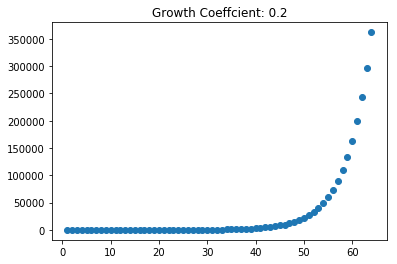

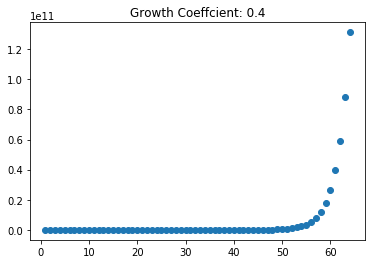

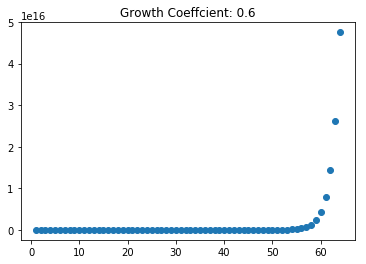

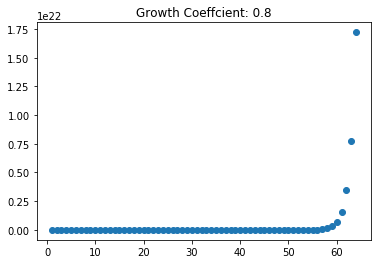

In [13]:
# Example of 
def known_exponential_growth(coefficient): 
    x_list = [];  y_list = []; 

    for i in range(64):
        x = i+1; 
        x_list.append(x)

    for i in range(len(x_list)):
        y = math.exp(coefficient*x_list[i]); 
        y_list.append(y)
    
    plt.scatter(x_list,y_list)
    plt.title("Growth Coeffcient: " + str(coefficient) )
    plt.show()

known_exponential_growth(0.2)
known_exponential_growth(0.4)
known_exponential_growth(0.6)
known_exponential_growth(0.8)
